# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [271]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [274]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [277]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() #inst

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds =  city_weather ["clouds"]["all"]
        city_wind =  city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colwyn bay
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | el reno
Processing Record 4 of Set 1 | vadso
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | alesund
Processing Record 8 of Set 1 | nosy varika
Processing Record 9 of Set 1 | malkapur
Processing Record 10 of Set 1 | filadelfia
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | withernsea
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | conceicao do rio verde
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | howrah
Processing Record 22 of Set 1 | taiohae
City not found. Skip

In [278]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [279]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colwyn bay,53.2948,-3.7267,12.64,89,99,4.02,GB,1731724459
1,kodiak,57.7900,-152.4072,1.73,75,0,6.69,US,1731724205
2,el reno,35.5323,-97.9550,14.62,50,0,5.66,US,1731724462
3,vadso,70.0744,29.7487,1.09,86,100,4.12,NO,1731724463
4,thompson,55.7435,-97.8558,-2.91,93,100,2.57,CA,1731724464


In [280]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [281]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colwyn bay,53.2948,-3.7267,12.64,89,99,4.02,GB,1731724459
1,kodiak,57.7900,-152.4072,1.73,75,0,6.69,US,1731724205
2,el reno,35.5323,-97.9550,14.62,50,0,5.66,US,1731724462
3,vadso,70.0744,29.7487,1.09,86,100,4.12,NO,1731724463
4,thompson,55.7435,-97.8558,-2.91,93,100,2.57,CA,1731724464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

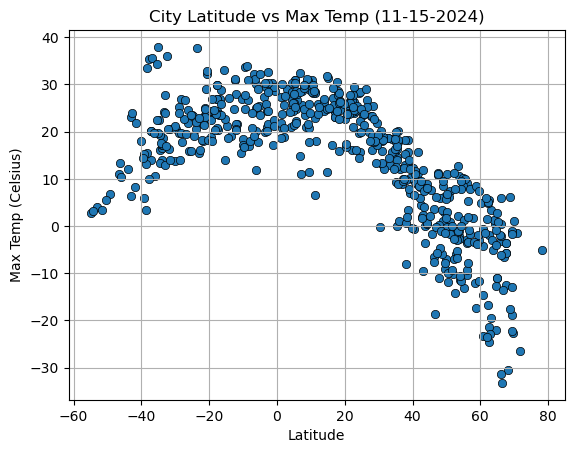

In [283]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='black', linewidth=0.5)

# Get today's date
today_date = datetime.now().strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Max Temp ({today_date})')
plt.ylabel("Max Temp (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

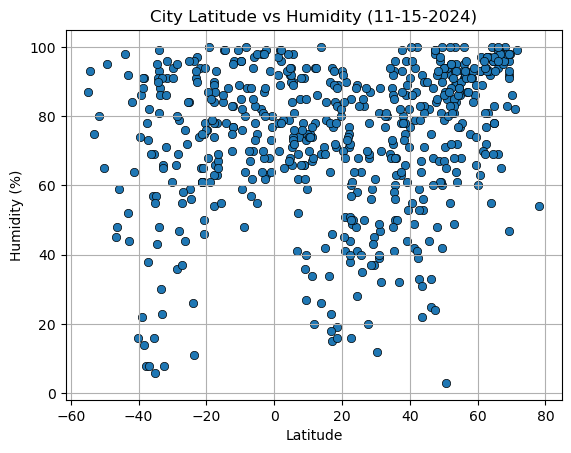

In [285]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor='black', linewidth=0.5)

# Get today's date
today_date = datetime.now().strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity ({today_date})')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

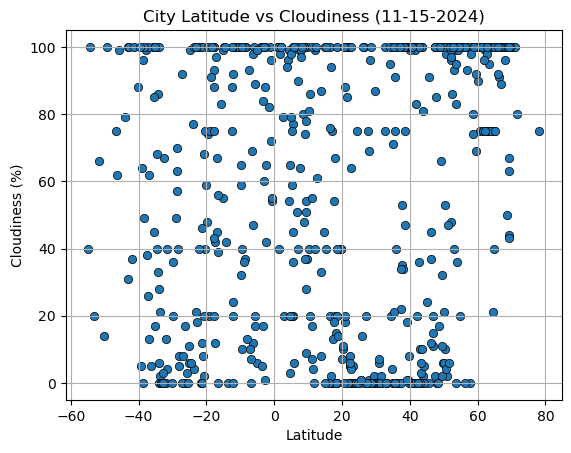

In [287]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor='black', linewidth=0.5)

# Get today's date
today_date = datetime.now().strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness ({today_date})')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

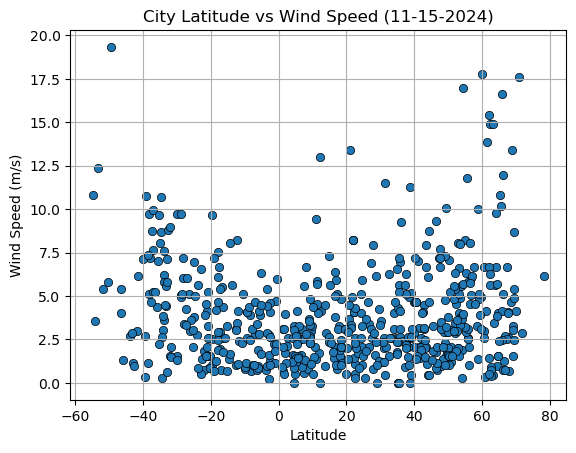

In [289]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor='black', linewidth=0.5)

# Get today's date
today_date = datetime.now().strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed ({today_date})')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [291]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
   
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r^2-value is: {rvalue**2}")

     # Set the title of the plot
    plt.title(f"Linear Regression of {title} vs. Latitude")
    
    plt.show()

In [292]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df[city_data_df['Lat'] >= 0]


# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colwyn bay,53.2948,-3.7267,12.64,89,99,4.02,GB,1731724459
1,kodiak,57.7900,-152.4072,1.73,75,0,6.69,US,1731724205
2,el reno,35.5323,-97.9550,14.62,50,0,5.66,US,1731724462
3,vadso,70.0744,29.7487,1.09,86,100,4.12,NO,1731724463
4,thompson,55.7435,-97.8558,-2.91,93,100,2.57,CA,1731724464


In [293]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,adamstown,-25.0660,-130.1015,23.50,84,11,3.80,PN,1731724465
7,nosy varika,-20.5833,48.5333,23.69,75,68,0.86,MG,1731724468
10,west island,-12.1568,96.8225,27.99,83,20,8.23,CC,1731724472
11,waitangi,-43.9535,-176.5597,12.12,98,79,2.68,NZ,1731724473
14,conceicao do rio verde,-21.8808,-45.0853,18.02,94,100,1.85,BR,1731724479


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7409011579388414


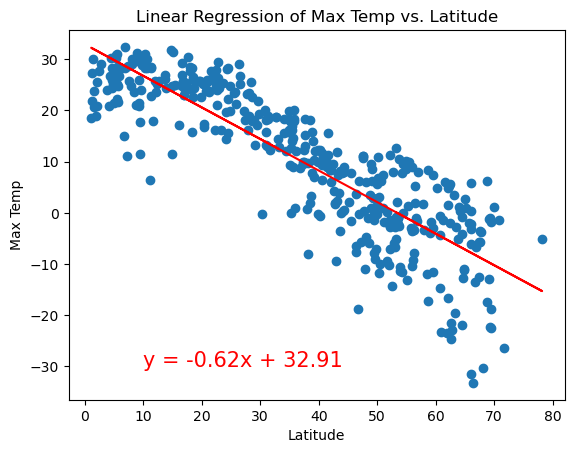

In [295]:
# Linear regression on Northern Hemisphere
# Define x_values and y_values for Temperature vs. Latitude
x_values_temp_north = northern_hemisphere['Lat']
y_values_temp_north = northern_hemisphere['Max Temp']

# Call the linear regression function for Temperature vs. Latitude
plot_linear_regression(x_values_temp_north, y_values_temp_north, "Max Temp", (10, -30))

The r^2-value is: 0.2697658569373886


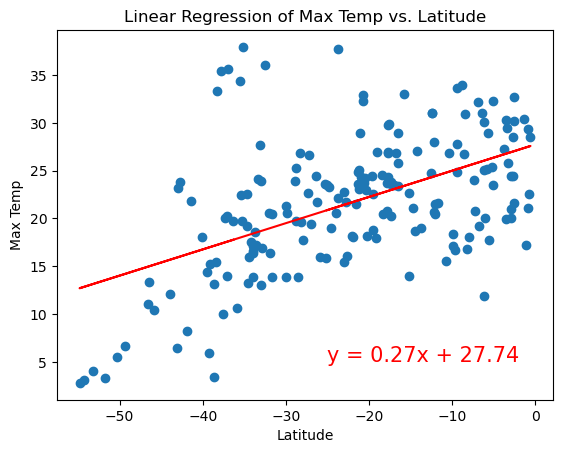

In [296]:
# Linear regression on Southern Hemisphere
# Define x_values and y_values for Temperature vs. Latitude
x_values_temperature = southern_hemisphere['Lat']
y_values_temperature = southern_hemisphere['Max Temp']

# Call the linear regression function for Temperature vs. Latitude
plot_linear_regression(x_values_temperature, y_values_temperature, "Max Temp", (-25, 5))

Discussion about the linear relationship: While an increase in latitude correlates with an increase in max temperature in both hemispheres, the relationship is much stronger in the northern hemisphere(r^2 = 0.728 vs 0.363). This makes sense considering a much larger portion of the southern hemisphere is dominated by water, which has a moderating effect on the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.07376383964797685


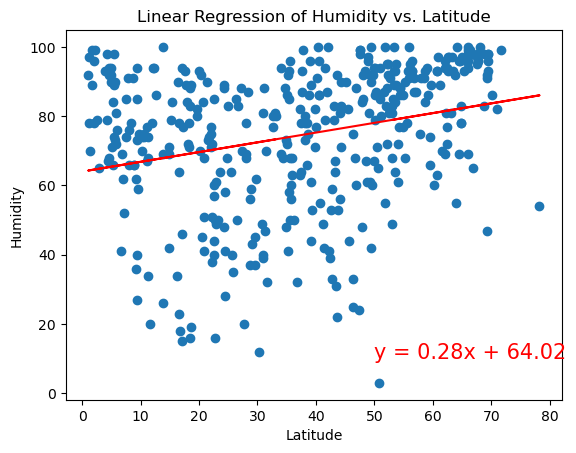

In [299]:
# Northern Hemisphere
# Define x_values and y_values for Humidity vs. Latitude
x_values_humid_north = northern_hemisphere['Lat']
y_values_humid_north = northern_hemisphere['Humidity']

# Call the linear regression function for Humidity vs. Latitude
plot_linear_regression(x_values_humid_north, y_values_humid_north, "Humidity", (50, 10))

The r^2-value is: 0.06163622738703561


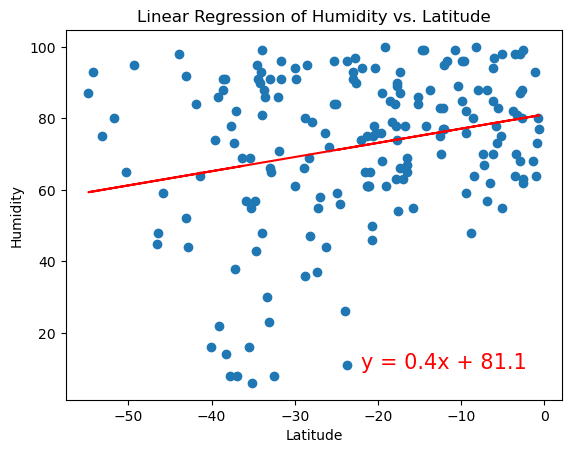

In [300]:
# Southern Hemisphere
# Define x_values and y_values for Humidity vs. Latitude
x_values_humid = southern_hemisphere['Lat']
y_values_humid = southern_hemisphere['Humidity']

# Call the linear regression function for Humidity vs. Latitude
plot_linear_regression(x_values_humid, y_values_humid, "Humidity", (-22, 10))

**Discussion about the linear relationship:** The r^2 value is incredibly low in both hemispheres when comparing humidity and latitude. This tells us that there is very little correlation between the two metrics.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.07246082026478545


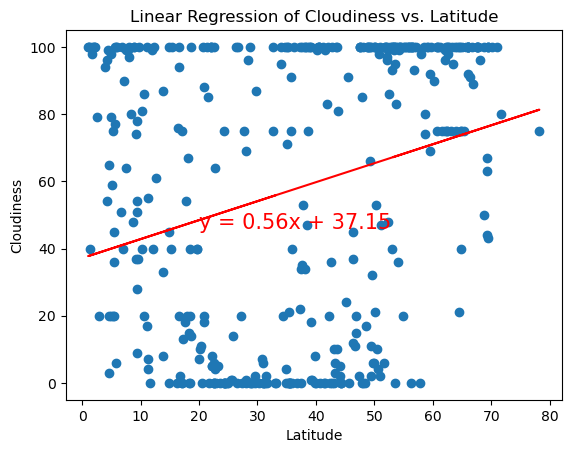

In [303]:
# Northern Hemisphere
# Define x_values and y_values for Cloudiness vs. Latitude
x_values_cloud_north = northern_hemisphere['Lat']
y_values_cloud_north = northern_hemisphere['Cloudiness']

# Call the linear regression function for Cloudiness vs. Latitude
plot_linear_regression(x_values_cloud_north, y_values_cloud_north, "Cloudiness", (20, 46))

The r^2-value is: 0.010680517407141077


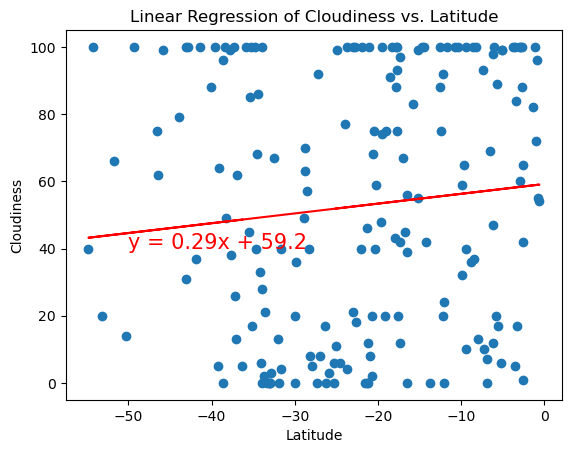

In [304]:
# Southern Hemisphere
# Define x_values and y_values for Cloudiness vs. Latitude
x_values_cloud = southern_hemisphere['Lat']
y_values_cloud = southern_hemisphere['Cloudiness']

# Call the linear regression function for Cloudiness vs. Latitude
plot_linear_regression(x_values_cloud, y_values_cloud, "Cloudiness", (-50, 40))

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.07854128057505659


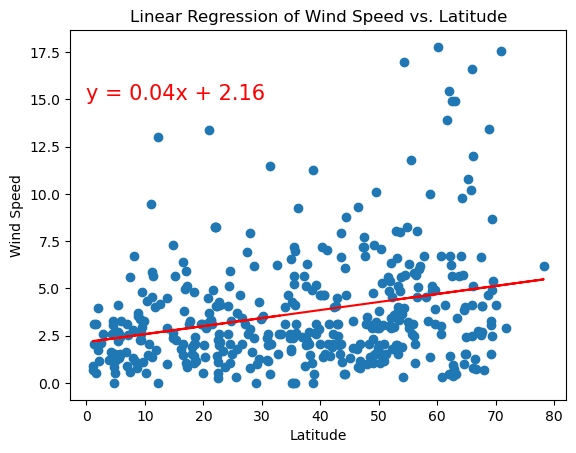

In [307]:
# Northern Hemisphere
# Define x_values and y_values for Wind Speed vs. Latitude
x_values_wind_north = northern_hemisphere['Lat']
y_values_wind_north = northern_hemisphere['Wind Speed']

# Call the linear regression function for Wind Speed vs. Latitude
plot_linear_regression(x_values_wind_north, y_values_wind_north, "Wind Speed", (0, 15))

The r^2-value is: 0.1714313364850661


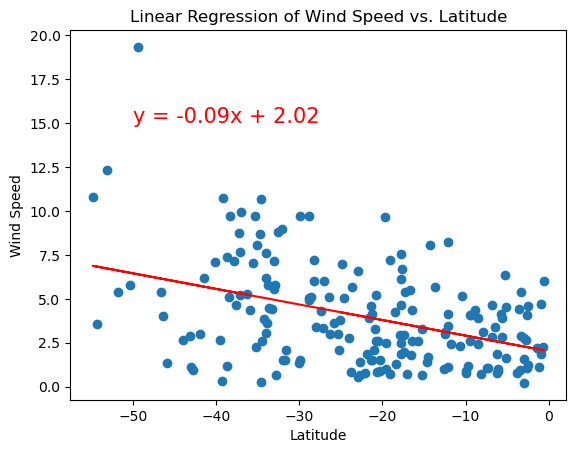

In [308]:
# Southern Hemisphere
# Define x_values and y_values for Wind Speed vs. Latitude
x_values_wind = southern_hemisphere['Lat']
y_values_wind = southern_hemisphere['Wind Speed']

# Call the linear regression function for Wind Speed vs. Latitude
plot_linear_regression(x_values_wind, y_values_wind, "Wind Speed", (-50, 15))

**Discussion about the linear relationship:** The low R^2 in both graphs suggests that latitude is not a good predictor of wind speed. The relationship is not linear, or other factors overshadow latitude's influence on wind speed.